<h1> Model Evaluation and Refinement</h1>

<h1>Table of content</h1>
<ul>
    <li>Model Evaluation </a></li>
    <li>Over-fitting, Under-fitting and Model Selection </a></li>
    <li>Ridge Regression </a></li>
    <li>Grid Search</a></li>
</ul>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

Using only the numeric data first:

In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 

In [4]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for plotting</h2>

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing the model is to split the data into training and testing data. Thus, placing the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [9]:
y_data = df['price']

drop price data in x data

In [10]:
x_data=df.drop('price',axis=1)

Now, randomly spliting the data into training and testing data using the function <b>train_test_split</b>. 

In [11]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 

 <p> Using the function <b> "train_test_split" </b> to split up the data set such that 40% of the data samples will be utilized for testing, setting the parameter "random_state" equal to zero. </p>
 The output of the function will be as follows:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1"
</div>

In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


Importing <b>LinearRegression</b> from the module <b>linear_model</b>.

In [13]:
from sklearn.linear_model import LinearRegression

Creating a Linear Regression object:

In [14]:
lre=LinearRegression()

Fitting the model using the feature horsepower :

In [15]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculating the R^2 on the test data:

In [16]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

It is clear that the R^2 is much smaller using the test data.

In [17]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

Finding the R^2  on the test data using 90% of the data for training data



In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

 Sometimes because of insufficient testing data; as a result, Cross-validation may be performed.

<h2>Cross-validation Score</h2>

Importing <b>model_selection</b> from the module <b>cross_val_score</b>.

In [19]:
from sklearn.model_selection import cross_val_score

Input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [20]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [21]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculating the average and standard deviation of our estimate:

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


Using negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [23]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026705, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Calculating the average R^2 using two folds, and the average R^2 for the second fold utilizing the horsepower as a feature : 

In [24]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc[1]

0.44319612775502903

<p> The function 'cross_val_predict' can also be used to predict the output. </p> <p>The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. </p>First, importing the function:

In [25]:
from sklearn.model_selection import cross_val_predict

Input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. So an output can be produced:

In [26]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Creating Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [27]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:

In [28]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Prediction using test data: 

In [29]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

<p> Performing some model evaluation using the training and testing data separately. </p>Firstly, importing the seaborn and matplotlibb library for plotting.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examining the distribution of the predicted values of the training data.

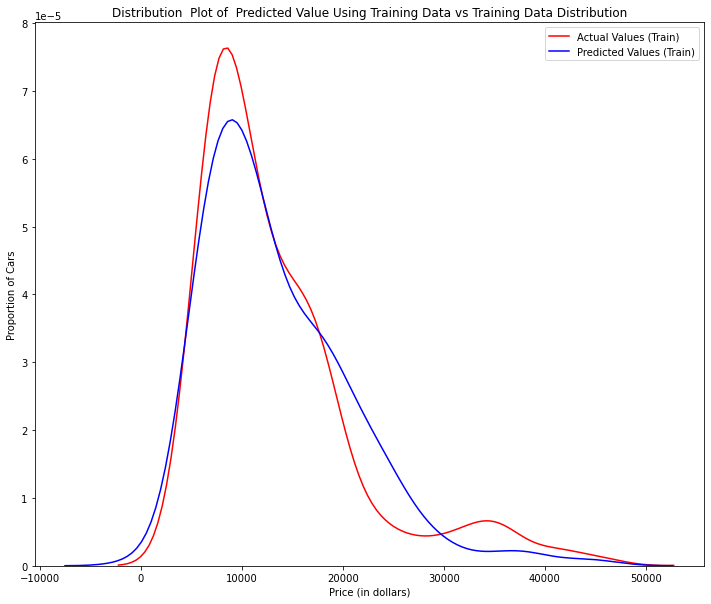

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, it is visible that the distribution of the predicted values is much different from the actual target values. 

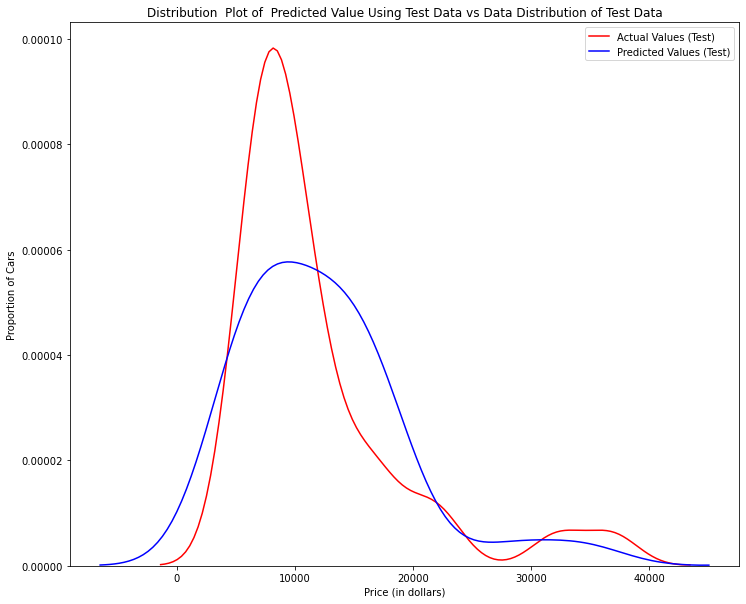

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

<p>Comparing Figure 1 and Figure 2; it is evident <b> the distribution of the test data in Figure 1 is much better at fitting the data.</b> </p> <p> This difference in Figure 2 is apparent where the ranges are from 5000 to 15000. This is where the distribution shape is exceptionally different.</p> <p> Checking, if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [33]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing the model using the test-set, this model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Therefore, creating a degree 5 polynomial model.</p>

Using 55 percent of the data for testing and the rest for training:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Performing a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [35]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Creating a linear regression model "poly" and training it.

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Calculating the output of this model using the method  "predict.", then assigning the values to "yhat".

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77547414,  7308.09791963, 12213.83954918, 18893.06169793,
       19995.73194318])

Taking the first five predicted values and comparing them to the actual targets. 

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77547414  7308.09791963 12213.83954918 18893.06169793]
True values: [ 6295. 10698. 13860. 13499.]


Using the function "PollyPlot" which is defined at the beginning of this notebook, to display the training data, testing data, and the predicted function.

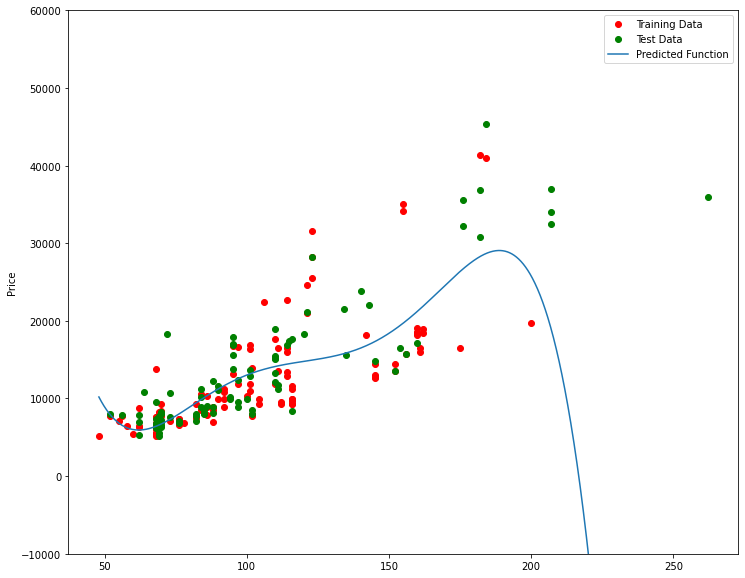

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

It is clear that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [40]:
poly.score(x_train_pr, y_train)

0.5567716899771691

 R^2 of the test data:

In [41]:
poly.score(x_test_pr, y_test)

-29.87184147296421

The R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. <p> <b> The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting. </p> </b>

Calculating the value of R^2 on the test data for different order polynomials and plot the results:

Text(3, 0.75, 'Maximum R^2 ')

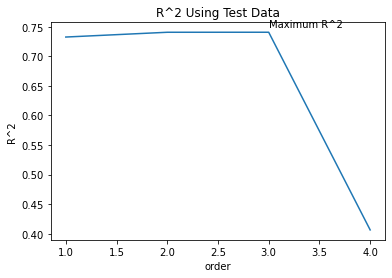

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

The R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows us to experiment with different polynomial orders and different amounts of data. 

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge regression</h2> 

 In this section, reviewing the Ridge Regression to see how the parameter Alfa changes the model. Here the test data will be used as validation data.

Performing a degree two polynomial transformation on the data. 

In [45]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Importing <b>Ridge</b>  from the module <b>linear models</b>.

In [46]:
from sklearn.linear_model import Ridge

Creating a Ridge regression object, setting the regularization parameter to 0.1 

In [47]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, this model cam be fitted using the method <b>fit</b>.

In [50]:
RigeModel.fit(x_train_pr, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

 Similarly, a prediction can be obtained: 

In [51]:
yhat = RigeModel.predict(x_test_pr)

Comparing the first five predicted samples to the test set 

In [52]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


Selecting the value of Alfa that minimizes the test error, for example, using a for loop. 

In [53]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Plotting the value of R^2 for different Alphas 

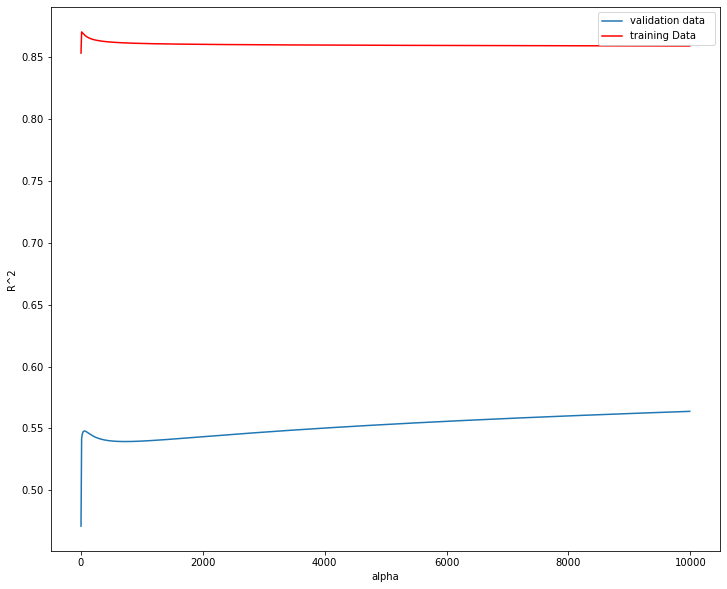

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

Performing the Ridge regression and calculating the R^2 using the polynomial features, using the training data to train the model and test data to test the model. The parameter alpha is set to  10.


In [55]:
RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)


0.4709833260694387

<h2 id="ref4">Part 4: Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Importing <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [56]:
from sklearn.model_selection import GridSearchCV

Creating a dictionary of parameter values:

In [57]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creating a ridge regions object:

In [58]:
RR=Ridge()
RR

Ridge()

Creating a ridge grid search object 

In [59]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fitting the model 

In [60]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. The estimator with the best parameters can be obtained and assigned to the variable BestRR as follows:

In [61]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Now testing the model on the test data 

In [62]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

Performing a grid search for the alpha parameter and the normalization parameter, then finding out the best values of the parameters:

In [63]:

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)